In [56]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers import LSTM,Dense,Flatten,Dropout 
from dataclasses import dataclass
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import pickle

                                                  dim_0 labels
0     [-0.79717168, -0.66439208, -0.37301463, 0.0408...     -1
1     [0.80485472, 0.63462859, 0.37347448, 0.0383434...      1
2     [0.7279851, 0.11128392, -0.49912439, -1.068629...     -1
3     [-0.23443909, -0.50215697, -0.73248781, -0.946...     -1
4     [-0.17132785, -0.062285311, 0.235829, 0.710395...     -1
...                                                 ...    ...
4916  [0.14363033, -0.13582291, -0.51027791, -0.8508...     -1
4917  [-0.16556762, -0.50461398, -0.78006546, -0.937...      1
4918  [0.71008362, 0.59397882, 0.3818858, 0.12728536...      1
4919  [0.0068470618, -0.14062427, -0.27059412, -0.37...      1
4920  [-0.54135529, -0.24172258, 0.10074086, 0.46895...      1

[4921 rows x 2 columns]
Datasample Label: -1
Datasample Label: 1


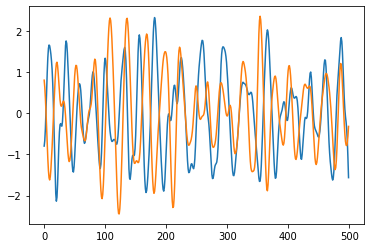

In [64]:
#import pickle file

with open('FordA/data.pkl', 'rb') as pickle_file:
    data = pickle.load(pickle_file)
    
print(data)
    
#Extract specific samples and plot data  

plt.plot(data.iloc[0]['dim_0'])
print("Datasample Label:", data.iloc[0]['labels'])

plt.plot(data.iloc[1]['dim_0'])
print("Datasample Label:", data.iloc[1]['labels'])


In [6]:
def dimenstion_mod(x):
    a = list()
    for i in range(x.shape[0]):
        a.append(x[i])
    a = np.array(a) 
    return np.reshape(a, (a.shape[0], a.shape[1],1))


In [7]:
def lstm(df,target):
    X =  df[df.columns.drop(target)].to_numpy()
    y = df[target].to_numpy(dtype=int)

    y = np.where(y == -1, 0, y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

    X_train = dimenstion_mod(X_train)
    X_val = dimenstion_mod(X_val)
    X_test = dimenstion_mod(X_test)

    model = Sequential()
    model.add(LSTM(100,
                return_sequences=True,
                input_shape=(X_train.shape[1],1)))
    model.add(LSTM(200, return_sequences=True))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    #model.add(LSTM(20))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy)

    history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val, y_val), validation_steps = 20 ,batch_size=100)

    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred > 0.5,1,0)

    cm = metrics.confusion_matrix(y_test, y_pred[:,0])
    balanced_accuracy = metrics.balanced_accuracy_score(y_test, y_pred[:,0])
    print(cm)

    return cm, balanced_accuracy

In [13]:
def load_data(data_path):
    """
    Loading of the dataset provided
    Edit the code below
    """
    data=None
    return data


def preprocess_data(data):
    """
    A standard nan removal to be added.
    Add more preprocessing steps if needed.
    """
    return data

def split_train_test(data):
    """
    Splitting the data into train, test, validation 
    """
    train, test = train_test_split(data,test_size=0.4, random_state=42,stratify=data['labels'])
    test, val = train_test_split(test,test_size=0.5, random_state=42, stratify=test['labels'])

    return train, test, val

def timeseries_transform(data):
    """
    Implement the timeseries transformer here
    """
    return

def model_training():
    """
    Train the data with the compatible model
    """
    model=None
    return model

def metric(validation_data, model):
    """
    Standard metrics and plotting should be same
    Metrics should be computed on validation data(unseen data)
    1. Balanced accuracy score
    2. Confusion matrix
    3. Per-class accuracy
    """
    metrics=None
    return metrics

def validation(metrics, metrics_validation):
    """
    Comparing the results with provided Series Embedder
    Plot confusion matrices of self analysis and LSTM with balanced_accuracy
    
    """
    return

if __name__=="__main__":
    path=None
    data=load_data(path)
    preprocessed_data=preprocess_data(data)

    transformed_data = timeseries_transform(preprocessed_data)
    train,test,val=split_train_test(transformed_data)
    model_self=model_training(train,test)
    metrics=metric(val,model_self)
    
    lstm_cm,lstm_balanced_accuracy=lstm(preprocessed_data,target='labels')
    metrics_validation = [lstm_cm, lstm_balanced_accuracy]
    validation(metrics,metrics_validation)

TypeError: 'NoneType' object is not subscriptable

In [9]:
sklearn.__version__

'1.1.1'